Linux I/O
===========

学习I/O的目的: 学习编写linux应用程序（APP）

IO是程序面向机器交互的一个重要概念

## 文件

Linux 拓展了文件的概念  
在linux中一切皆文件  

+ Linux文件的种类 :  

| 文件 | 标识 | 注释 |
| --- | --- | --- |
| 常规文件 | r | Linux 拓展了文件的概念 |
| 目录文件 | d |  |
| 字符设备文件 | c | 键盘和鼠标         |
| 块设备 | b | U盘 |
| 管道 | p | |
| 套接字文件 | s |
| 符号链接 | l | 快捷方式 |


# 标准I/O

1. I/O的含义:  
   I -input  
   O -output  
2. 系统调用:是由操作系统提供的接口,是供外部访问内部的中介    
   
3. 库函数:不同的操作系统的接口不一样,在移植时会涉及改动大量的代码,库函数可以将函数操作翻译成不同下的系统调用  
   把系统调用封装成库函数就可以起到隔离的作用，提供程序的可移植性  
   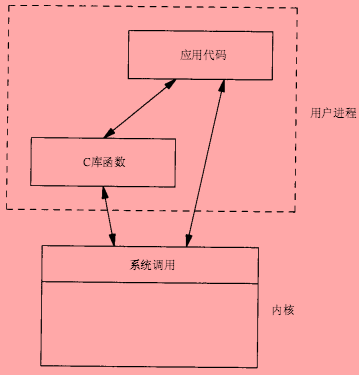

4. 主流的操作系统都实现了C库,只要使用**标准I/O**就可以免去为不同操作系统所做的更改
   
5. 三种标准IO:
 
|  | |      |   |
| -------------- | - | ------------ | ----- |
| 标准输入流（键盘）| 0 | STDIN_FILENO | stdin |
| 标准输出流（显示器）| 1 | STDOUT_FILENO | stdout |
| 标准错误流 | 2 | STDERR_FILENO | stderr |

> 缓冲区的概念:  

   为了减少操作IO设备的次数，提高运行效率，在内存里面设置的缓冲区  
   全缓冲：缓冲区满才输出  当流的缓冲区无数据或无空间时才执行实际IO操作

   行缓冲：遇到换行符输出  
   
          当流和一个终端关联时，典型的行缓冲  
   
   stdin/stdout 默认是行缓冲
   stderr没有缓冲

### 流

+ 流的概念:  
   就是数据的流，在程序中就是一个结构体  
+ FILE  
   标准IO用一个结构体类型来存放打开的文件的相关信息  
   标准I/O的所有操作都是围绕FILE来进行  
+ 流（stream）  
   FILE又被称为流(stream)  
   流又分为**二进制流**和**文本流**  
   在Linux和windows中有些不同  
   Windows中:  
   二进制流:换行符‘\n’  
   文本流:换行符‘\r’ ‘\n’  
   Linux中:  
   换行符‘\n’  

### 文件的打开

下列函数可用于打开一个标准I/O流：
```
FILE *fopen (const char *path, const char *mode);
```
第一个参数是:打开的文件的路径  
第二个参数是:打开的方式  
成功时返回流指针；出错时返回NULL  

| 参数        | 说明         |
| ----------- | -------------------------------|
| “r” 或 “rb” | 以只读方式打开文件，文件必须存在 |
| “r+” 或 ”r+b” | 以读写方式打开文件，文件必须存在 |
| “w” 或 “wb” | 以只写方式打开文件，若文件存在则文件长度清为0 若文件不存在则创建 |
| “w+” 或 “w+b” | 以读写方式打开文件，其他同”w” |
| “a” 或 “ab” | 以只写方式打开文件，若文件不存在则创建；向文件写入的数据被追加到文件末尾 | 
| “a+” 或 “a+b” | 以读写方式打开文件。其他同”a” |

   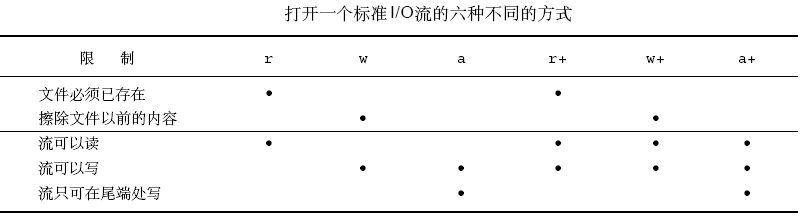

In [ ]:
#include <stdio.h>
int main(int argc,  char *argv[])
{
   FILE *fp; // 定义流指针
   if ((fp = fopen(“test.txt”, “r+”)) == NULL)
    // fopen打开文件后将结果返回给fp这个流指针
    // 这里if判断文件是否打开成功
   {
       printf(“fopen  error\n”);
       return -1;
   }
   return  0;
 }

### 文件的关闭

下列函数可用于打开一个标准I/O流：
```
int fclose(FILE *stream)；
```
文件的输入是 文件流指针  
返回值是一个整形值  
关闭成功返回0，失败返回EOF，并设置errno  
流关闭时自动刷新缓冲中的数据并释放缓冲区  
当一个程序正常终止时，所有打开的流都会被关闭  
流一旦关闭后就不能执行任何操作  

In [ ]:
#include <stdio.h>
#include <errno.h>
#include <string.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    int fpret;
    fp = fopen("1.txt","r");
    if(fp==NULL)//判断文件是否打开成功
    {
        printf("Open file Failed\n");
        return -1;
    }
    else
    {
       printf("Open file success\n");
       fpret = fclose(fp); // fpret用于接收fclose的返回值
       if(fpret==0)
       {
            printf("file close sucess\n");
       }
       else
       {
            printf("file close failed\n")
       }
    }
}

### I/O 错误信息处理

```C
void perror(const char *s);
char *strerror(int errno);
```
perror先输出字符串s，再输出错误号对应的错误信息  
strerror根据错误号返回对应的错误信息  
errno 存放错误号，由系统生成  

In [ ]:
#include <stdio.h>
#include <errno.h>
#include <string.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    int fpret;
    fp = fopen("1.txt","r");
    if(fp==NULL)
    {
        perror("fopen");
        printf("fopen:%s\n",strerror(errno));            
    }
    else
    {
       printf("Open file success\n");
       fpret = fclose(fp);
       if(fpret==0)
       {
            printf("file close sucess\n");
       }
       else
       {
            perror("fclose");
       }
    }
}

## 读写流

### 读一个字符

文件读一个字符
可以用以下方式输入一个字符:
```
 int  fgetc(FILE *stream);
 int  getc(FILE *stream);   //宏
 int  getchar(void);
```
成功时返回读取的字符；若到文件末尾或出错时返回EOF（-1)  
getchar()等同于fgetc(stdin)  
getc和fgetc区别是一个是宏一个是函数  
fget 按道理得到的应该是文件里的第一个字符,但返回值却是int类型,这样做是为了能处理的范围更大

In [8]:
#include <stdio.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    int rec;
    fp = fopen("1.txt","r");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
    
    rec = fgetc(fp);//读第一个
    printf("Get char=%c\n",rec);
    rec = fgetc(fp);//读第二个
    printf("Get char=%c\n",rec);
    rec = fgetc(fp);//读第三个
    printf("Get char=%c\n",rec);
    rec = fgetc(fp);//读第四个
    printf("Get char=%c\n",rec);
    //流指针每次读完都后移一个位置
    fclose(fp);
    return 0;
}

Get char=a
Get char=b
Get char=c
Get char=d


In [6]:
#include <stdio.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    int rec;
    fp = fopen("1.txt","r");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
    
    rec = fgetc(fp);//读第一个
    printf("Get char=%c\n",rec);
    
    if(rec==-1)
    {
       perror("fgetc");
    }
    // 如果中间关闭了文件,再打开
    fclose(fp);
    fp = fopen("1.txt","r");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
    
    rec = fgetc(fp);//读第二个
    printf("Get char=%c\n",rec); 
    rec = fgetc(fp);//读第二个
    printf("Get char=%c\n",rec); 
    //每次打开文件都是从头开始读
    fclose(fp);
    return 0;
    }

Get char=a
Get char=a
Get char=b


In [ ]:
#include <stdio.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    int rec;
    fp = fopen("1.txt","r");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
    rec = getchar();
    printf("Get STD input=%c\n",rec);
    fclose(fp);
    return 0;
}

### 写一个字符

文件写一个字符  
可以用以下方式读入一个字符:  
```
int  fputc(int c, FILE *stream);
int  putc(int c, FILE *stream);
int  putchar(int c);
```
成功时返回写入的字符；出错时返回EOF  
putchar(c)等同于fputc(c, stdout)  
putc和fputc区别是一个是宏一个是函数  

In [9]:
#include <stdio.h>

int main(int argc,char *argv[])
{   
    FILE *fp;
    int rec;
    fp = fopen("1.txt","a+");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
    
    int wrc='w';
    rec = fputc(wrc,fp);
    if(rec==-1)
    {
       perror("fputc");
       fclose(fp);
       return 0;
    }
    putchar(wrc);
    fclose(fp);
} 

w

### 读字符串

下列函数用来输入一行:  
```C
char* gets(char* s);
char* fgets(char* s, int size, FILE* stream); // 从stream中读取并向buff中写入size-1个字符
```
成功时返回s，到文件末尾或出错时返回NULL  
gets不推荐使用，容易造成缓冲区溢出 C
遇到’\n’或已输入size-1个字符时返回，总是包含’\0’  

In [ ]:
#include <stdio.h>

int main(int argc,char *argv[]){
    FILE *fp;
    char *ret;
    char buff[100]; 
    
    fp = fopen("1.txt","r");
    
    if(fp==NULL)
    {
	    perror("fopen");
        return 0;
    }
    
    ret = fgets(buff,5,stdin);//从标准输入中获取
    
    if(ret==NULL)
    {
        perror("fgets");
        fclose(fp);
        return 0;
    }
    printf("buff=%s\n",buff);
}

In [ ]:
#include <stdio.h>

int main(int argc,char *argv[]){
    FILE *fp;
    char *ret;
    int retn;
    char buff[100]; //定义一个缓冲区
    fp = fopen("1.txt","a+");
    if(fp==NULL)
    {
	    perror("fopen");
        return 0;
    }

    ret = fgets(buff,5,fp);// 从文件中获取
    if(ret==NULL)
    {
        perror("fgets");
        fclose(fp);
        return 0;
    }
    printf("buff=%s\n",buff);

}

### 写字符串

下列函数用来输出字符串:
```C
int  puts(const char* s);
int fputs(const char* s,  FILE* stream); //向stream中输出字符串
```
成功时返回非负整数；出错时返回EOF  
puts将缓冲区s中的字符串输出到stdout，并追加'\n' 
fputs将缓冲区s中的字符串输出到stream,不追加'\n'  

In [ ]:
#include <stdio.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    char *ret;
    int retn;
    char buff[100];
    fp = fopen("1.txt","a+");
    
    if(fp==NULL)
    {
        perror("fopen");
        return 0;

    }
    retn = fputs("hello world",stdout);//输出到标准输出
    if(retn==-1)
    {
	perror("fputs");
    }
    fclose(fp);

}

In [ ]:
#include <stdio.h>

int main(int argc,char *argv[])
{
    FILE *fp;
    char *ret;
    int retn;
    char buff[100];
    fp = fopen("1.txt","a+");
    
    if(fp==NULL)
    {
        perror("fopen");
        return 0;

    }
    retn = fputs("hello world",fp);//输出到文件
    if(retn==-1)
    {
	perror("fputs");
    }
    printf("hahaha\n");
    fclose(fp);

}

### 二进制读写

文本文件和二进制文件的存储格式不同  
+ 文本文件:
    文本文件只能存储文本,文本也即字符.  
    计算机只能存储数字,能将字符转化成数字的办法就是通过ASCII码进行编码.

+ 二进制文件:
  计算机中除了文本文件,其他都是二进制文件,如图片、视频、音乐
  但是这些二进制编码对我们来说是不可见的，二进制文件由于不可"理解",对其进行更改需要用到二进制读写

文件的读和写还可以用下面的函数:  
这两个函数能处理二进制文件的读写  
```C
size_t fread(void* ptr, size_t size, size_t n, FILE* fp)         //读
size_t fwrite(const void* ptr, size_t size, size_t n, FILE* fp)   //写
```
第一个参数是读写的内容的位置指针  

第二个参数是读写的块大小

第三个参数是读写的个数

最后一个参数是文件操作的流指针

In [ ]:
#include <stdio.h>
#include <stdlib.h>

int main(int argc,char *argv[])
{
   FILE *fp;
   char *buff;   
   size_t ret;
   //文本文件打开
   fp=fopen("1.txt","r");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   }
   //缓冲区内存申请,因为buff是指针，所以要用malloc申请内存 
   buff=(char*)malloc(100);
   if(buff==NULL)
   {
      return 0;
   }
   //二进制读
   ret = fread(buff,10,1,fp); //从fp文件中读取10个字节，每次读取1个，存到buff中
   if(ret==-1)
   {
       perror("fread");
       goto end;
   }
   printf("buf=%s\n",buff); 
  
   return 0;

end:
   free(buff);//释放申请的内存
   fclose(fp);
   return -1;
}

In [2]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
//结构体定义一个二进制文件
struct student
{
   char name[16];
   int age;
   char sex[8];
};


int main(int argc,char *argv[])
{
   FILE *fp;
   size_t ret;
   
   struct student stu;
    //打开一个二进制文件
   fp=fopen("1.bin","w");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
    }

    strcpy(stu.name,"zhangsan");
    stu.age = 20;
    strcpy(stu.sex,"male");
    //将结构体的内容写到二进制文件里去
    ret = fwrite(&stu, sizeof(stu), 1, fp); //将stu的内容写到fp文件中,每次写1个，写stu的大小个
    if(ret == -1)
    {
        perror("fwrite");
        goto end;
    }
    else
    {
        printf("write struct student success!\n");
    }
end:
    fclose(fp);
}


write struct student success!


从上面存储了student stu1信息的1.bin文件中读取信息写到student stu2中

In [3]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

struct student
{
   char name[16];
   int age;
   char sex[8];
};


int main(int argc,char *argv[])
{
   FILE *fp;
   size_t ret;
   
   struct student stu2;

   fp=fopen("1.bin","r");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   }
   ret = fread(&stu2,sizeof(stu2),1,fp);  //从fp文件中读取stu2的大小个，每次读取1个，存到stu2中
   if(ret ==-1)
   {
      perror("fread");
      goto end;
   }

   printf("name=%s,age=%d,sex=%s\n",stu2.name,stu2.age,stu2.sex);
   return 0;

end:
   fclose(fp);
   return 0;
}

name=zhangsan,age=20,sex=male


打开1.bin文件写入信息，再让stu2从1.bin中读

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

struct student
{
   char name[16];
   int age;
   char sex[8];
};

int main(int argc,char *argv[])
{
   FILE *fp;
   size_t ret;
   
   struct student stu;
   struct student stu2;

   fp=fopen("1.bin","w");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   }

   strcpy(stu.name,"zhangsan");
   stu.age = 49;
   strcpy(stu.sex,"male");
   
   ret = fwrite(&stu,sizeof(stu),1,fp);
   //写完之后文件的指针走到末尾
   if(ret ==-1)
   {
      perror("fwrite");
      goto end;

   }
   else
   {
     printf("write struct student success!\n");
   }
   fclose(fp);

   //写完之后要重新打开再读,让文件指针指向文件头
   fp=fopen("1.bin","r");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   }
  
   ret = fread(&stu2,sizeof(stu),1,fp);
   if(ret ==-1)
   {
      perror("fread");
      goto end;
   }
   printf("name=%s,age=%d,sex=%s\n",stu2.name,stu2.age,stu2.sex);

end:
   fclose(fp);
}

## 刷新流

可以用下面的函数来对流进行刷新  
可以实时得到输出
```C
int fflush(FILE* fp);
```
成功时返回0；出错时返回EOF  
将流缓冲区中的数据写入实际的文件  
Linux下只能刷新输出缓冲区,输入缓冲区丢弃  

In [1]:
#include <stdio.h>
#include <unistd.h>
int main(int argc,char *argv[])
{

   printf("abcdefg");
   fflush(stdout);//刷新标准输出
   while(1)
   {
      sleep(1);
   }
}

abcdefg

In [ ]:
#include <stdio.h>
#include <unistd.h>
int main(int argc,char *argv[])
{
   FILE *fp;
   fp=fopen("1.txt","w");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   } 

   fwrite("abcdef",7,1,fp);
   fflush(fp);//刷新文件流
   while(1)
   {
      sleep(1);
   }
}

## 流的定位

```C
long ftell(FILE* stream);
long fseek(FILE* stream, long offset, int whence);
void rewind(FILE* stream);
```
+ ftell() 成功时返回流的当前读写位置，出错时返回EOF  
+ fseek() 定位一个流，成功时返回0，出错时返回EOF   
  
  offset 偏移量
  
  offset 位移量为新的读写位置,可正可负
  
  whence参数：SEEK_SET(从文件头)/SEEK_CUR(从当前位置)/SEEK_END(从文件结尾)  
  
  用a模式打开文件时函数无效 

+ rewind(fp)相当于fseek(fp,0,SEEK_SET);  
  
这三个函数只适用于2G以下的文件

In [1]:
#include <stdio.h>

int main(int argc,char *argv[])
{    
   FILE *fp;
   fp=fopen("1.txt","w");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   }

   fwrite("abcdef", 6, 1, fp);//向fp文件中写6个字符每次写1个
   fseek(fp, -2, SEEK_CUR);//从当前读写位置后退2个
   fwrite("vvv",3,1,fp);//再从当前位置写3个
}

最终文件1.txt中的内容为：
abcdvvv

In [2]:
#include <stdio.h>

int main(int argc,char *argv[])
{    
   FILE *fp;
   fp=fopen("1.txt","w");
   if(fp==NULL)
   {
      perror("fopen");
      return 0;
   }

   fwrite("abcdef",6,1,fp); //向fp文件中写6个字符每次写1个
   printf("current fp=%d\n",(int)ftell(fp));  //打印当前文件指针位置,强转为int的目的是为了能打印出来
   rewind(fp);
   printf("After rewind fp=%d\n",(int)ftell(fp));
   fwrite("vvv",3,1,fp); //从文件头开始写3个
}

current fp=6
After rewind fp=0


最终文件1.txt的内容为：
vvvdef

## 格式化输入输出

> 格式化输出

```C
int printf(const char* fmt, …);
int fprintf(FILE* stream, const char* fmt, …);
int sprintf(char* s, const char* fmt, …);
```
成功时返回输出的字符个数；出错时返回EOF

下面利用标准输出打印时间信息

In [4]:
#include "stdio.h"

int main(int argc,char *argv[])
{

    char buf[100]={0};
    int year=2023;
    int month= 12;
    int day=30;

    int syear;
    int smonth;
    int sday;
    //向buf中输出
    sprintf(buf,"%d-%d-%d",year,month,day);//将year,month,day格式化到buf中
    //向终端输出
    printf("%s\n",buf);  //打印buf
    
    printf("%d\n",sprintf(buf,"%d-%d-%d",year,month,day)); 
    return 0;

}

2023-12-30


In [ ]:
#include "stdio.h"

int main(int argc,char *argv[])
{
    FILE *fp;
    int year=2021;
    int month=10;
    int day=1;
    
    fp=fopen("ftest.txt","w");
    if(fp==NULL)
    {
       perror("fopen");
       return 0;
    }
    fprintf(fp,"%d-%d-%d\n",year,month,day);//向文件中输出
    fclose(fp);
}

> 格式化输出

```C
int fscanf(FILE* stream, const char* format, ...);
int sscanf(const char* str, const char* format, ...);
```


In [3]:
#include "stdio.h"

int main(int argc,char *argv[])
{
    char buf[100]={0};
    int year=2021;
    int month= 10;
    int day=1;

    int syear;  
    int smonth;
    int sday;

    sscanf(buf,"%d-%d-%d",&syear,&smonth,&sday); //从buf中读取
    printf("%d,%d,%d\n",syear,smonth,sday);

}

956381696,-2009645498,0


In [ ]:
#include "stdio.h"
int main(int argc,char *argv[])
{
    FILE *fp;
    int year;
    int month;
    int day;

    fp=fopen("ftest.txt","r");
    if(fp==NULL)
    {
       perror("fopen");
       return 0;
    }

    fscanf(fp,"%d-%d-%d",&year,&month,&day);
    printf("%d,%d,%d\n",year,month,day);
    fclose(fp);
}

## 标准I/O综合练习

每隔1秒向文件test.txt中写入当前系统时间，格式如下:   

1,  2014-10-15 15:16:42  
2,  2014-10-15 15:16:43  
该程序无限循环，直到按Ctrl-C中断程序  
每次执行程序时，系统时间追加到文件末尾，序号递增  

1,  2014-10-15 15:16:42  
2,  2014-10-15 15:16:43  
3,  2014-10-16 11:35:07  
4,  2014-10-16 11:35:08  


In [ ]:
#include <time.h>
#include <stdio.h>
#include <unistd.h>
#include <string.h>


int main(int argc,char *argv[])
{
    FILE *fp;
    time_t ctime;
    struct tm *ctimestr;
    int linecount = 0; //行号
    char buf[32];

    //文件打开
    fp=fopen("test.txt","a+");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }  
    
    //计算行号
    //按行读取,一行大约30个左右的字符
    while(fgets(buf,32,fp)!=NULL)//如果成功读到了字符,直到读完一行
    {         
        if(buf[strlen(buf)-1] =='\n')//如果最后读取到的字符是换行
        {
            linecount++;//该行读完,行号加1
        }
    } 

    while(1)
    {
        ctime = time(NULL);//获得系统时间秒数
        ctimestr = localtime(&ctime);//将秒的时间转换成日期时间,返回值是一个结构体,传入的参数是地址
        printf("%04d-%02d-%02d %02d:%02d:%02d\n",
                ctimestr->tm_year+1900,
                ctimestr->tm_mon+1,
                ctimestr->tm_mday,
                ctimestr->tm_hour,
                ctimestr->tm_min,
                ctimestr->tm_sec);

        fprintf(fp,"%d, %04d-%02d-%02d %02d:%02d:%02d\n",
                    linecount,//输出行号
                    ctimestr->tm_year+1900,
                    ctimestr->tm_mon+1,
                    ctimestr->tm_mday,
                    ctimestr->tm_hour,
                    ctimestr->tm_min,
                    ctimestr->tm_sec);
        fflush(fp);
        linecount++;
        sleep(1);
    }

    fclose(fp);
}

# 文件I/O

## 文件I/O的解释

不同的操作系统所提供的系统调用不同    

由posix (可移植操作系统接口) 定义的一组函数  

文件I/O不提供缓冲机制,每次读写都会引起系统调用  

核心是`文件描述符`,文件I/O的操作通过`文件描述符`完成

文件I/O和标准I/O之间不可混用  

> 文件描述符

每个打开的文件都对应一个文件描述符  

文件描述符是一个非负整数。Linux为程序中每个打开的文件分配一个文件描述符  

文件描述符从0开始分配，依次递增  

文件IO操作通过文件描述符来完成  

## 文件I/O的打开和关闭

> open函数用来创建或打开一个文件:

```C
 #include <fcntl.h>
 int open(const char *pathname, int flags);
 int open(const char *pathname, int flags, mode_t mode);
 ```

成功时返回文件描述符；出错时返回EOF  

打开文件时使用两个参数  
创建文件时第二个参数指定新文件的权限  
只有在建立新文件时有效 此外真正建文件时的权限会受到umask 值影响，实际权限是mode-umaks  
可以打开设备文件，但是不能创建设备文件 

 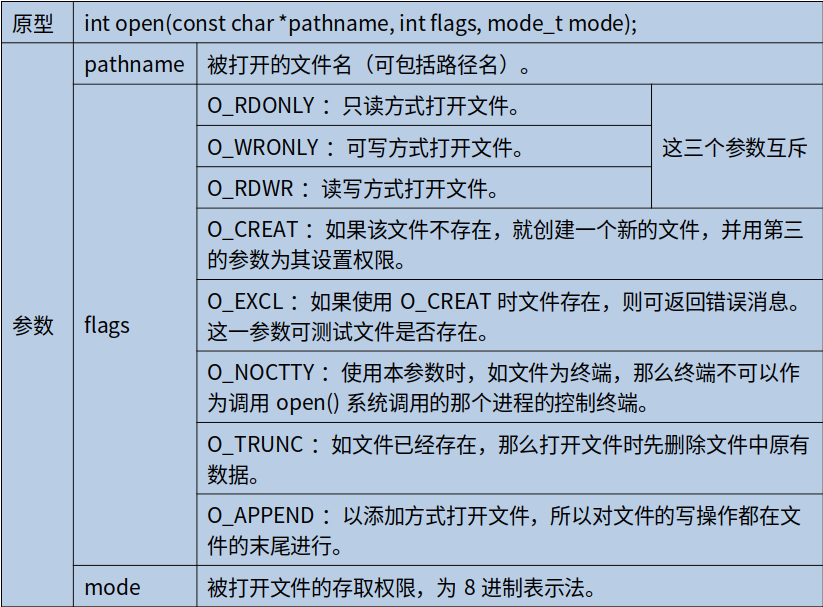


| 模式  | 参数1  | 参数2  | 参数3  | 权限   |
| --- | ------ | ------ | ------ | --- | 
| r   | O_RDONLY |  |  |    |      
| r+  | O_RDWR   |  |  |    |      
| w   | O_WRONLY | O_CREAT | O_TRUNC | 0664 |
| w+  |	O_RDWR | O_CREAT | O_TRUNC | 0664 |
| a	  |	O_WRONLY | O_CREAT | O_APPEND | 0664 |
| a+  |	O_RDWR | O_CREAT | O_APPEND | 0664 | 

umask ：用来设定文件或目录的初始权限  
文件和目录的真正初始权限:  
文件或目录的初始权限 = 文件或目录的最大默认权限 - umask权  

> close函数用来关闭一个打开的文件:

```C
 #include  <unistd.h>
 int  close(int fd);
``` 

成功时返回0；出错时返回EOF  
程序结束时自动关闭所有打开的文件  
文件关闭后，文件描述符不再代表文件  

In [1]:
#include <stdio.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <unistd.h>

int main(int argc,char *argv[])
{
    int fd;
    int ret;
    // 文件I/O打开 
    fd = open("test.txt", O_WRONLY|O_CREAT|O_TRUNC, 0666);
    //以只写方式打开文件,如果文件不存在则创建,如果文件存在则清空
    if(fd < 0) //返回值小于0意味着打开失败
    {
       printf("open file err\n");
       return 0;
    }
    printf("sucess,fd=%d\n",fd);
    //文件I/O关闭
    ret = close(fd);
    if(ret<0)
    {
        printf("close failed\n");
    }
    ret=close(fd);
    printf("ret=%d\n",ret);//再次打开失败返回-1
}


sucess,fd=3
ret=-1


## 文件IO的读写

> 文件I/O读

read函数用来从文件中读取数据:
 ```C
#include  <unistd.h>
ssize_t  read(int fd, void *buf, size_t count);
 ``` 

成功时返回实际读取的字节数；出错时返回EOF  
读到文件末尾时返回0  
buf是接收数据的缓冲区  
count不应超过buf大小  

> 文件I/O写

write函数用来向文件写入数据:

```C
#include  <unistd.h>
ssize_t  write(int fd, void *buf, size_t count);
``` 

成功时返回实际写入的字节数；出错时返回EOF  
buf是发送数据的缓冲区  
count不应超过buf大小  

> 文件I/O定位 

lseek函数用来定位文件:
```c
#include  <unistd.h>
off_t  lseek(int fd, off_t offset, intt whence);
```
成功时返回当前的文件读写位置；出错时返回EOF  
参数offset和参数whence同fseek完全一样  

In [8]:
#include <stdio.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <string.h>
int main(int argc,char *argv[])
{
   int fd;
   int ret;
   char buf[32] = "hello world";
   char buf2[32]={0};
   //文件打开    
   fd = open("test.txt", O_RDWR|O_CREAT|O_APPEND, 0666);
   if(fd < 0)
   {
      printf("open file err\n");
      return 0;
   }
   printf("sucess,fd=%d\n",fd);

   //文件写
   ret = write(fd,buf,strlen(buf));//对二进制文件应该用sizeof
   if(ret < 0)
   {
      perror("write");
      goto END;
   }
   printf("write count=%d\n",ret);
   //文件定位
   lseek(fd,0,SEEK_SET);
   //文件读
   ret = read(fd,buf2,32);
   if(ret < 0)
   {
      perror("read");
      goto END;
   }
   buf2[31]=0;
   printf("read buf2=%s\n",buf2);

END:
   close(fd);
}

sucess,fd=3
write count=11
read buf2=hello world


## 文件属性和文件目录

### 访问目录

> 打开一个目录文件:

```C
#include  <dirent.h>
DIR * opendir(const char *name);
DIR * fdopendir(int fd);  //使用文件描述符，要配合open函数使用
```
DIR是用来描述一个打开的目录文件的结构体类型  
成功时返回目录流指针；出错时返回NULL  

> 读取目录流中的内容:

```c
#include  <dirent.h>
struct  dirent *readdir(DIR *dirp);
```
struct dirent是用来描述目录流中一个目录项的结构体类型  
包含成员char  d_name[256]   参考帮助文档  
成功时返回目录流dirp中下一个目录项；  
出错或到末尾时时返回NULL  

> 关闭一个目录文件:
 
 ```c
 #include  <dirent.h>
 int closedir(DIR *dirp);
 ```

成功时返回0；出错时返回EOF

In [2]:
// 打开指定目录，并打印所有文件名
#include <dirent.h>
#include <stdio.h>
int main(int argc,char **argv)
{
    DIR* dp;  //定义目录流指针
    struct dirent *dt;  //定义目录项结构体指针

    dp = opendir("/home/legendfantasy/");
    if(dp == NULL)
    {
        perror("opendir");
        return 0;
    }
    
    while((dt=readdir(dp))!=NULL)  //读取目录流中的目录项
    {
       printf("%s\n",dt->d_name);  //文件名成员在目录项结构体中
    }   
    closedir(dp);
}

tftpboot
.bakvim
.dotnet
.xinputrc
.pki
.vscode
vimconfig.tar.bz2
.condarc
.gnome
makeru
pycharm-community-2022.2.2
.lesshst
anaconda3
latex_file
.python_history
.profile
.cinnamon
代码
.apport-ignore.xml
.gphoto
.mozilla
视频
homework
.jupyter
.bash_history
.pam_environment
.vim_mru_files
.npm
.thunderbird
.viminfo.tmp
D9 目录操作和文件属性获取
.bashrc
.net
snap
..
音乐
.vimrc
文档
.xsession-errors
图片
RGBX_Semantic_Segmentation-main
.
vimconfig
.cache
下载
.platformio
.gtkrc-2.0
.virtual_documents
.ssh
.ipython
.gnupg
test.c
.viminfo
v2ray
D10 静态库和动态库的使用
sqlist
.vim
pythoncode
manim
C C++ code
.presage
.themes
Barrier.pem
.continuum
.yarn
.dmrc
.sudo_as_admin_successful
.local
.config
.purple
.conda
file
.icons
.Xauthority
.java
nfs
公共的
e(fd);
桌面
.anaconda
.bash_logout
.xsession-errors.old
anacondacode
模板
.ipynb_checkpoints


In [ ]:
//通过用户输入获得目录，打印指定的目录下所有文件名称
#include <dirent.h>
#include <stdio.h>
int  main(int argc, char *argv[]) 
{
    DIR *dirp;
    struct dirent *dp;
    if (argc < 2) 
    {
       printf(“Usage : %s<directory>\n”, argv[0]);  
       return -1;
    }
    
    if ((dirp  = opendir(argv[1])) == NULL) 
    {
        perror(“opendir”);  
        return -1;
    }
    while ((dp = readdir(dirp)) != NULL) 
    {
        printf(“%s\n”, dp->d_name);
    }
    closedir(dirp);
}

### 修改文件访问权限

chmod/fchmod函数用来修改文件的访问权限:
```c
 #include  <sys/stat.h>
 int  chmod(const char *path, mode_t mode);
 int  fchmod(int fd, mode_t mode);
```
成功时返回0；出错时返回EOF
root和文件所有者能修改文件的访问权限
示例： chmod(“test.txt”, 0666);

In [ ]:
// 修改指定文件的权限
#include <stdio.h>
#include <sys/stat.h>

int main(int argc,char **argv)
{
   int ret;
   ret = chmod("temp",0444);
   if(ret<0)
   {
        perror("chmod");
        return 0;
    }
}

### 获取文件属性

 stat/lstat/fstat函数用来获取文件属性:

 ```c
 #include  <sys/stat.h>
 int  stat(const char *path, struct stat *buf);
 int  lstat(const char *path, struct stat *buf);
 int  fstat(int fd, struct stat *buf);
```

成功时返回0；出错时返回EOF  
如果path是符号链接stat获取的是目标文件的属性；而lstat获取的是链接文件的属性

下面是一个打印指定文件的权限和文件名等信息的示例代码

In [ ]:
#include <stdio.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <unistd.h>
#include <time.h>

int main (int argc,char **argv)
{
    struct stat buf;
    int ret;
    ret = stat("chmod_t.c",&buf);
    if(ret<0)
    {
        perror("stat");
        return 0;
    }
    //判断文件类型
    if(S_ISREG(buf.st_mode))//如果是常规文件
    {
       printf("-");
    }
    if(S_ISDIR(buf.st_mode))//如果是目录文件
    {
        printf("d");
    }
    if(S_ISCHR(buf.st_mode))//如果是字符文件
    {
        printf("c");
    }
    if(S_ISBLK(buf.st_mode))//如果是块文件
    {
        printf("b");
    }
    if(S_ISFIFO(buf.st_mode))//如果是管道文件
    {
        printf("p");
    }
    if(S_ISSOCK(buf.st_mode))//如果是sock文件
    {
        printf("s");
    }
   
   // 打印文件权限
    int i;
    for(i=8;i>=0;i--)
    {
       if(buf.st_mode & (1<<i))//通过移位比较,左移8位和第一个比较
       {
            switch(i%3)
            {
                case 2:
                    printf("r");
                break;
                case 1:
                    printf("w");
                break;
                case 0:
                    printf("x");
                break;
            }
        }
        else
        {
           printf("-");
        }
    }
    //打印文件大小
    printf(" %d",(int)buf.st_size);
    //打印当前时间
    struct tm *t;
    t = localtime(&buf.st_ctime);
    printf(" %d-%d-%d %d:%d",t->tm_year+1900,t->tm_mon+1,t->tm_mday,t->tm_hour,t->tm_min);
    //打印文件名
    printf(" chmod_t.c\n");
}

下面是一个打印当前目录下所有常规文件的文件和大小等信息

In [ ]:
//遍历一个文件夹下所有文件,并打印文件大小和日期
#include <stdio.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <unistd.h>
#include <time.h>
#include <dirent.h>

int main (int argc,char **argv)
{
    DIR* dp;
    struct stat buf;
    struct dirent *dt;//目录流内容
    int ret;
    //char file_path[256];
    //char *folder_path = "/home/legendfantasy/homework/";
    
    dp = opendir("/home/legendfantasy/homework/");//打开目录
    if(dp == NULL)
    {
        perror("opendir");
        return 0;
    }

    while((dt=readdir(dp))!=NULL)
    {
        //sprintf(file_path, "%s/%s", folder_path, dt->d_name);
		ret = stat(dt->d_name,&buf);
        if(ret == -1)
        {
            perror("readdir");
            continue;
        }
        if (S_ISREG(buf.st_mode)) 
        {
            //打印文件名
            printf("%s\n",dt->d_name);
            //打印文件大小
            printf("%d\n",(int)buf.st_size);
            //打印当前时间
            struct tm *t;
            t = localtime(&buf.st_ctime);
            printf("%d-%d-%d %d:%d\n",t->tm_year+1900,t->tm_mon+1,t->tm_mday,t->tm_hour,t->tm_min);

        }
    }   
    closedir(dp);    
}